In [1]:
cd ..

/Users/flamholz/Documents/workspace/txn_factor_concs


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Distribution of TF Concentration in E. coli
Data here is measured by Ribosome Profiling in Li et al. Cell 2014.
https://pubmed.ncbi.nlm.nih.gov/24766808/

In [3]:
rich_medium_df = pd.read_csv('data/proteomaps/Coli_Li2014/eco_Li_complete.csv', sep='\t', skiprows=1)
minimal_medium_df = pd.read_csv('data/proteomaps/Coli_Li2014/eco_Li_minimal.csv', sep='\t', skiprows=1)

In [4]:
mask = np.logical_and(rich_medium_df['!Pathway'] == 'Transcription factors',
                      rich_medium_df['!Abundance:[ppm]'] > 0)
rich_tf_df = rich_medium_df[mask]

mask = np.logical_and(minimal_medium_df['!Pathway'] == 'Transcription factors',
                      minimal_medium_df['!Abundance:[ppm]'] > 0)
minimal_tf_df = minimal_medium_df[mask]
minimal_tf_df.head()

,!Protein:Identifier,!Abundance:[original],!Abundance:[ppm],!SizeWeightedAbundance:[original],!SizeWeightedAbundance:[ppm],!Protein:Size,!Protein:Name,!Identifiers:kegg.orthology,!Pathway
8,b1339,26.0,4.620632,9100.0,5.490965,350.0,abgR,K14057,Transcription factors
32,b0464,87.0,15.461345,18705.0,11.286649,215.0,acrR,K03577,Transcription factors
35,b2213,15.0,2.665749,5310.0,3.204069,354.0,ada,K10778,Transcription factors
42,b4116,11.0,1.954883,2783.0,1.679270,253.0,adiY,K03755,Transcription factors
54,b3131,187.0,33.233006,50303.0,30.352969,269.0,agaR,K02081,Transcription factors


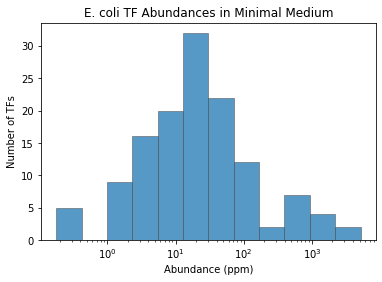

In [5]:
plt.figure()
sns.histplot(
    minimal_tf_df,
    x="!Abundance:[ppm]", 
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
plt.xlabel('Abundance (ppm)')
plt.ylabel('Number of TFs')
plt.title('E. coli TF Abundances in Minimal Medium')

plt.show()

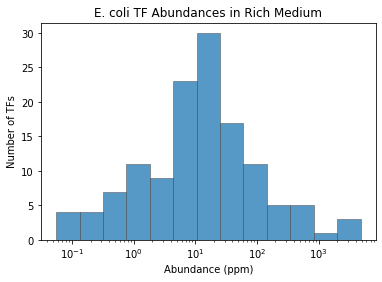

In [6]:
plt.figure()
sns.histplot(
    rich_tf_df,
    x="!Abundance:[ppm]", 
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
plt.xlabel('Abundance (ppm)')
plt.ylabel('Number of TFs')
plt.title('E. coli TF Abundances in Rich Medium')

plt.show()